# Weather Exploratory Data Analysis.
## Introduction

In this project I will be performing Exploratory Data Analysis (EDA) to uncover interesting patterns, insights, and potential anomalies within the Weather dataset.

I will be addressing different questions and tasks in the analysis:
## Data Overview and Cleaning
* What are the key characteristics of the dataset i.e number of records, features and data types.
* Identify and handle any missing or null values. Describe your approach and reasoning.
* Check for and address any duplicate records.

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib  inline

In [3]:
# Loading the dataset
df = pd.read_csv(r"C:\Users\JimmyCharo\Downloads\1. Weather Data.csv")

In [4]:
# View the first 5 rows of the dataset
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [5]:
# Checking the number of records and features
rows, columns = df.shape
print(f"This dataset has {rows} rows and {columns} columns")

This dataset has 8784 rows and 8 columns


In [6]:
# Checking column names
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

The dataset includes the following features:
* Date/Time: Timestamp of the observation.
* Temp_C: Temperature in degrees Celcius.
* Dew Point Temp_C: Dew point temperature in degrees Celcius.
* Rel Hum_%: Relative humidity as a percentage.
* Wind Speed_km/h: Wind speed in kilometers per hour.
* Visibility_km: Visibility in kilometres.
* Press_kPa: Atmospheric pressure in kilopascals.
* Weather: Weather conditions.

In [8]:
# Check for the dataset information. We can also see the datatypes from this.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [9]:
# All variables have the correct data types except for the Date/Time.
# Changing the Date/Time datatype
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [10]:
# Checking for the correct datatypes.
df.dtypes

Date/Time           datetime64[ns]
Temp_C                     float64
Dew Point Temp_C           float64
Rel Hum_%                    int64
Wind Speed_km/h              int64
Visibility_km              float64
Press_kPa                  float64
Weather                     object
dtype: object

The Date/Time variable is now in the correct data type.

In [12]:
# Checking and handling any missing values
df.isnull().sum()

Date/Time           0
Temp_C              0
Dew Point Temp_C    0
Rel Hum_%           0
Wind Speed_km/h     0
Visibility_km       0
Press_kPa           0
Weather             0
dtype: int64

Our dataset did not consist of any missing values.

In [14]:
# Checking for any duplicate records
duplicates = df.duplicated().sum()
print(duplicates)

0


There are no duplicate records in the dataset.

# Statistical Summary:

* Provide a statistical summary of the dataset (mean, median, standard deviation, etc.) for numerical features.
* Identify and describe any significant outliers in the data.

In [17]:
df.describe(include=[int,float])

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


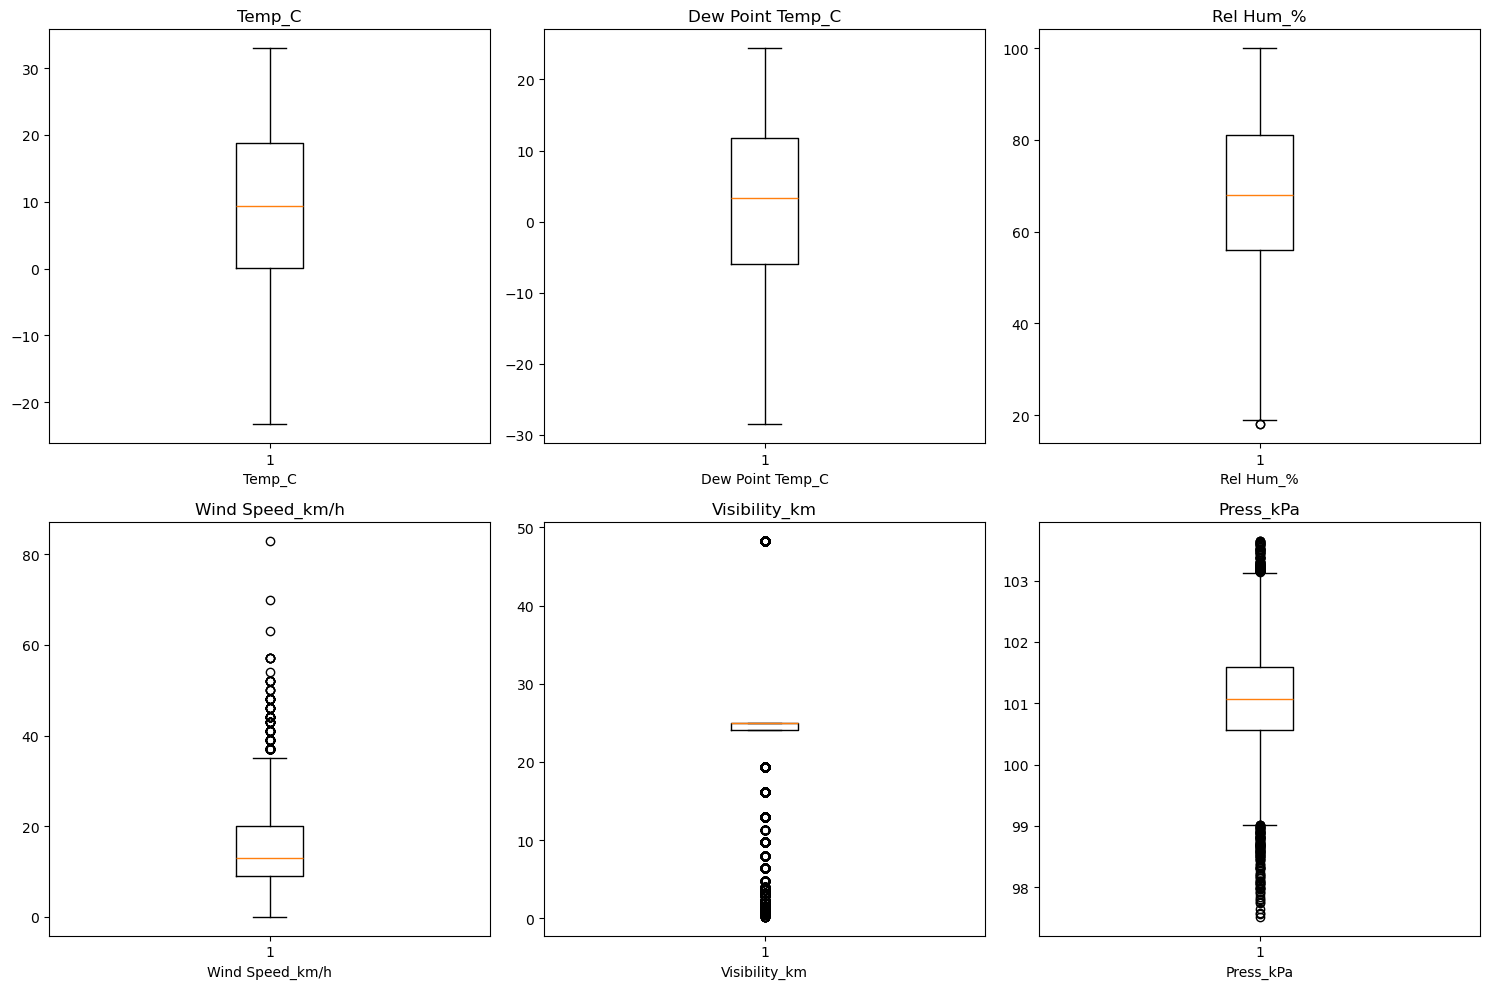

In [18]:
# Identifying outliers
# List of columns to plot
columns = ['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']

# Creating box plots for each column
plt.figure(figsize=(15, 10))

for i, column in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    plt.boxplot(df[column])
    plt.title(column)
    plt.xlabel(column)
    
plt.tight_layout()
plt.show()

From the above, we clearly see the columns that have outliers include 'Wind Speed_km/h' and 'Visibility_km'. From the 'Wind Speed_km/h' column, The wide range from 0.0 to 83.0 km/h, combined with a relatively high standard deviation, suggests that there are outliers in this distribution. The visibility range is large, with a minimum value of 0.2 km, which is much lower than the first quartile (24.1 km). We clearly see from the Visibility box plot that there are outliers at the low end.

# Data Visualization:

* Create visualizations to show the distribution of key weather parameters (e.g., temperature, humidity, wind speed).
* Plot time series graphs to visualize trends over time. Highlight any notable patterns or seasonal variations.
* Create correlation matrices and heatmaps to identify relationships between different weather parameters.


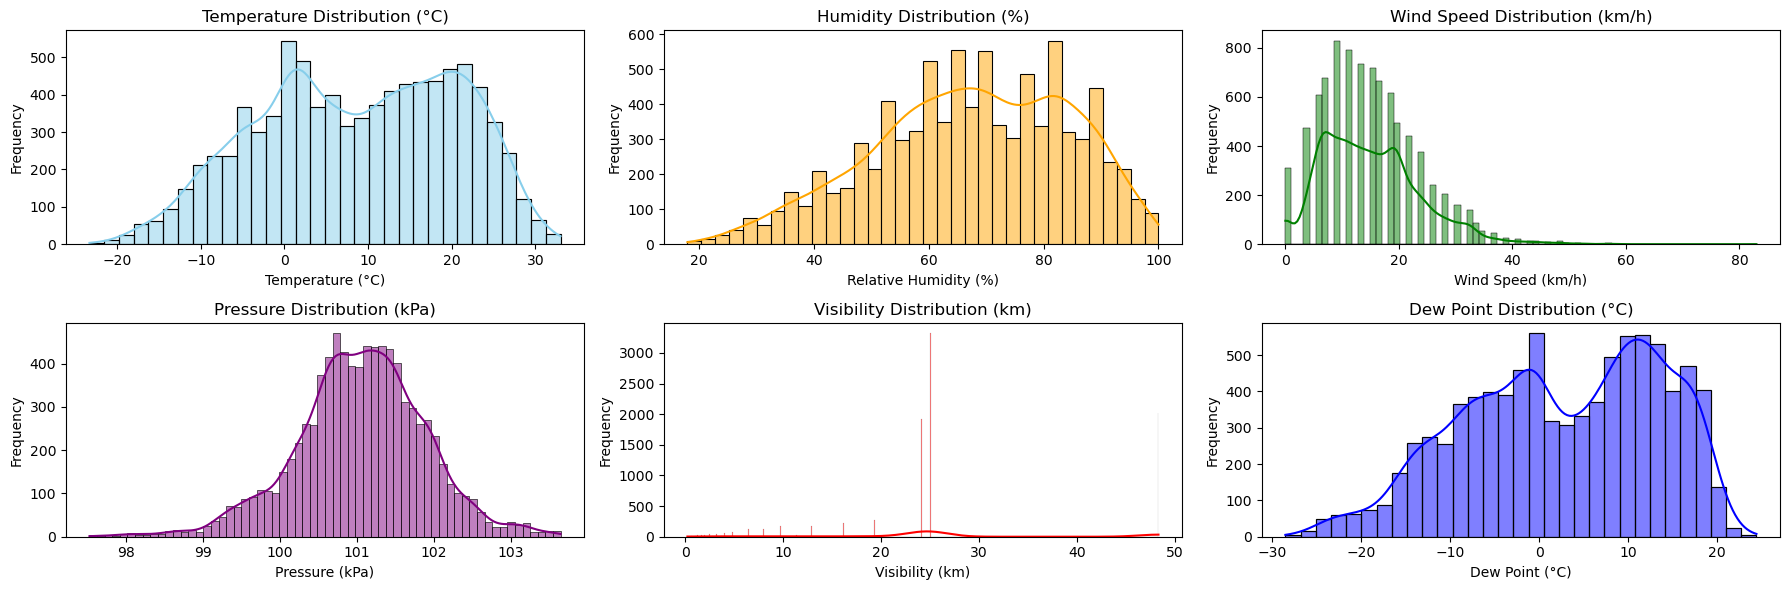

In [21]:
# 1. Distribution of Key Weather Parameters
plt.figure(figsize=(18, 6))

# Temperature Distribution
plt.subplot(2, 3, 1)
sns.histplot(df['Temp_C'], kde=True, color='skyblue')
plt.title('Temperature Distribution (°C)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Humidity Distribution
plt.subplot(2, 3, 2)
sns.histplot(df['Rel Hum_%'], kde=True, color='orange')
plt.title('Humidity Distribution (%)')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Frequency')

# Wind Speed Distribution
plt.subplot(2, 3, 3)
sns.histplot(df['Wind Speed_km/h'], kde=True, color='green')
plt.title('Wind Speed Distribution (km/h)')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')

# Pressure Distribution
plt.subplot(2, 3, 4)
sns.histplot(df['Press_kPa'], kde=True, color='purple')
plt.title('Pressure Distribution (kPa)')
plt.xlabel('Pressure (kPa)')
plt.ylabel('Frequency')

# Visibility Distribution
plt.subplot(2, 3, 5)
sns.histplot(df['Visibility_km'], kde=True, color='red')
plt.title('Visibility Distribution (km)')
plt.xlabel('Visibility (km)')
plt.ylabel('Frequency')

# Visibility Distribution
plt.subplot(2, 3, 6)
sns.histplot(df['Dew Point Temp_C'], kde=True, color='blue')
plt.title('Dew Point Distribution (°C)')
plt.xlabel('Dew Point (°C)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

The plots above illustrate the distribution of key weather parameters in the dataset:

* Temperature Distribution: The temperature is mostly centered around 0°C to 20°C, with a few observations below -20°C and above 30°C.
* Relative Humidity Distribution: Relative humidity has a skewed distribution, with most values between 50% and 90%.
* Wind Speed Distribution: Wind speed typically ranges between 0 and 40 km/h, with fewer occurrences at higher speeds.
* Pressure Distribution: Atmospheric pressure shows a normal distribution centered around 101 kPa.
* Visibility Distribution: Visibility is usually around 25 km, but there are instances of lower visibility, with some data points close to 0 km.
* Dew Point Temperature Distribution: Similar to temperature, the dew point temperature is centered around 0°C, with some values extending to both extremes.

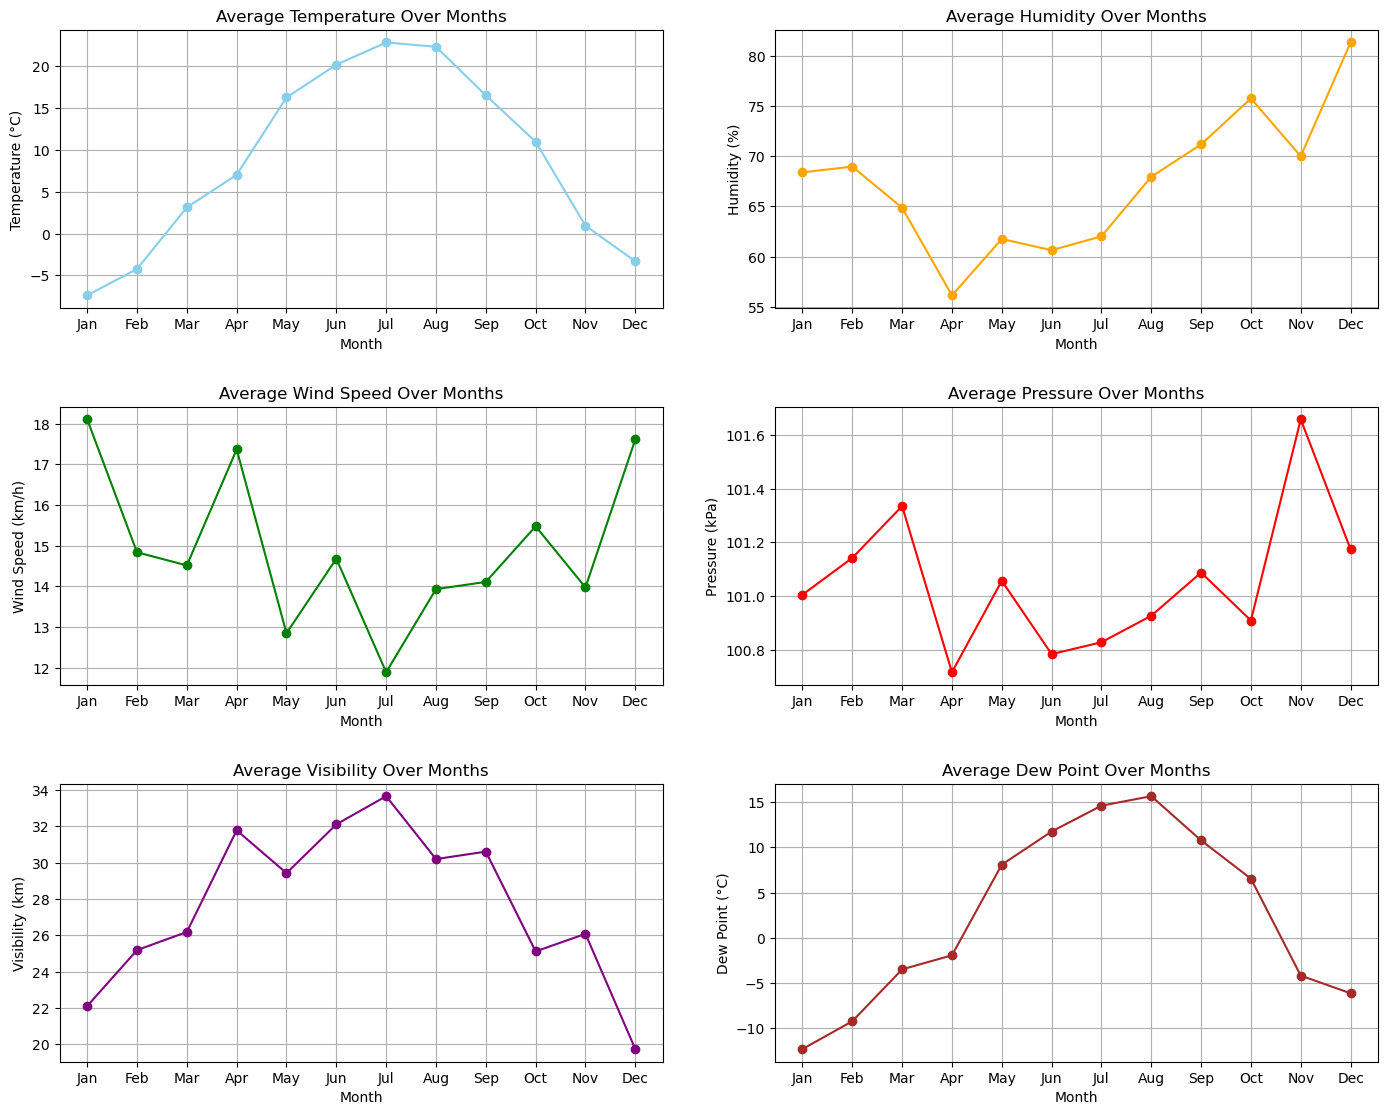

In [23]:
# 2. Time Series graphs
# Create a figure and a grid of subplots
fig, axs = plt.subplots(3, 2, figsize=(15, 12))

# Adjust layout
fig.tight_layout(pad=5.0)

# Extracting the month from the 'Date/Time' column
df['Month'] = df['Date/Time'].dt.month

# Grouping by month and calculating the average for each weather parameter
monthly_avg_temp = df.groupby('Month')['Temp_C'].mean()             # Average Temperature
monthly_avg_hum = df.groupby('Month')['Rel Hum_%'].mean()           # Average Humidity
monthly_avg_win = df.groupby('Month')['Wind Speed_km/h'].mean()     # Average Wind Speed
monthly_avg_press = df.groupby('Month')['Press_kPa'].mean()         # Average Pressure
monthly_avg_vis = df.groupby('Month')['Visibility_km'].mean()       # Average Visibility
monthly_avg_dew = df.groupby('Month')['Dew Point Temp_C'].mean()    # Average Dew Point

# Temperature subplot
axs[0, 0].plot(monthly_avg_temp.index, monthly_avg_temp, marker='o', color='skyblue')
axs[0, 0].set_title('Average Temperature Over Months')
axs[0, 0].set_xlabel('Month')
axs[0, 0].set_ylabel('Temperature (°C)')
axs[0, 0].set_xticks(range(1, 13))
axs[0, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[0, 0].grid(True)

# Humidity subplot
axs[0, 1].plot(monthly_avg_hum.index, monthly_avg_hum, marker='o', color='orange')
axs[0, 1].set_title('Average Humidity Over Months')
axs[0, 1].set_xlabel('Month')
axs[0, 1].set_ylabel('Humidity (%)')
axs[0, 1].set_xticks(range(1, 13))
axs[0, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[0, 1].grid(True)

# Wind Speed subplot
axs[1, 0].plot(monthly_avg_win.index, monthly_avg_win, marker='o', color='green')
axs[1, 0].set_title('Average Wind Speed Over Months')
axs[1, 0].set_xlabel('Month')
axs[1, 0].set_ylabel('Wind Speed (km/h)')
axs[1, 0].set_xticks(range(1, 13))
axs[1, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[1, 0].grid(True)

# Pressure subplot
axs[1, 1].plot(monthly_avg_press.index, monthly_avg_press, marker='o', color='red')
axs[1, 1].set_title('Average Pressure Over Months')
axs[1, 1].set_xlabel('Month')
axs[1, 1].set_ylabel('Pressure (kPa)')
axs[1, 1].set_xticks(range(1, 13))
axs[1, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[1, 1].grid(True)

# Visibility subplot
axs[2, 0].plot(monthly_avg_vis.index, monthly_avg_vis, marker='o', color='purple')
axs[2, 0].set_title('Average Visibility Over Months')
axs[2, 0].set_xlabel('Month')
axs[2, 0].set_ylabel('Visibility (km)')
axs[2, 0].set_xticks(range(1, 13))
axs[2, 0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[2, 0].grid(True)

# Dew Point Temp subplot
axs[2, 1].plot(monthly_avg_dew.index, monthly_avg_dew, marker='o', color='brown')
axs[2, 1].set_title('Average Dew Point Over Months')
axs[2, 1].set_xlabel('Month')
axs[2, 1].set_ylabel('Dew Point (°C)')
axs[2, 1].set_xticks(range(1, 13))
axs[2, 1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
axs[2, 1].grid(True)

# Show the combined plot
plt.show()

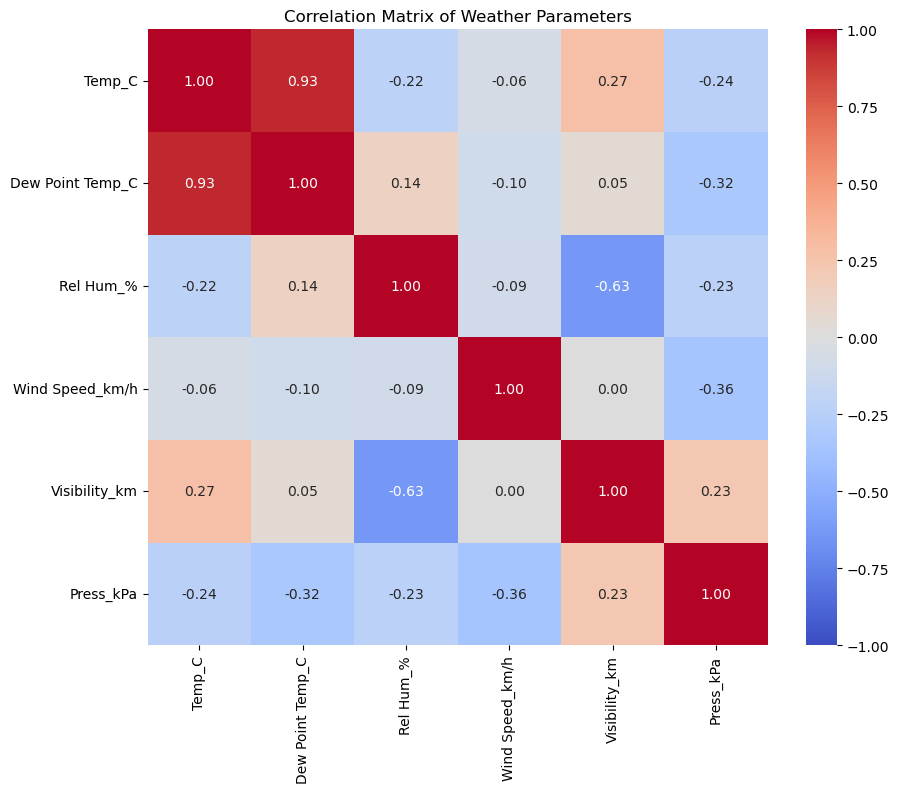

In [24]:
# 3. Correlation Matrix
plt.figure(figsize=(10, 8))

# Correlation matrix
corr_matrix = df[['Temp_C', 'Dew Point Temp_C', 'Rel Hum_%', 'Wind Speed_km/h', 'Visibility_km', 'Press_kPa']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Weather Parameters')
plt.show()

# Weather Patterns and Trends:

1. Temperature and Humidity Variation Across Months:
* Temperature: The average temperature follows a typical seasonal pattern, peaking in the summer months (June to August) and dropping to its lowest in the winter months (December to February). This is consistent with expected seasonal variations in a temperate climate.
* Humidity: Humidity tends to be higher during the colder months (November to February) and lower during the warmer months (April to August). This pattern might be due to the capacity of air to hold moisture, which increases with temperature.
2. Wind Speed and Pressure Trends:
* Wind Speed: Wind speed appears to fluctuate throughout the year with peaks in January, April, and December, indicating potentially stronger winds in these months. There isn’t a clear seasonal trend as with temperature, but the fluctuations might be influenced by other factors such as geographical features or weather systems.
* Pressure: Pressure is relatively stable throughout the year, with slight increases in January and December. Higher pressure during these months could be associated with colder, denser air masses.
3. Visibility and Dew Point:
* Visibility: Visibility tends to be lower in the colder months (January, November, December) and higher in the summer months. This might be due to factors like fog, which is more common in colder temperatures, affecting visibility.
* Dew Point: Dew point follows a similar trend to temperature, with higher values in the summer months and lower in winter. This indicates more moisture in the air during warmer periods.
* Humidity and Visibility: A strong negative correlation between humidity and visibility is observed, which makes sense as higher humidity often leads to fog and reduced visibility.
## Anomalies and Unusual Patterns:
* Temperature-Wind Speed Relationship: The correlation matrix indicates a weak negative correlation between temperature and wind speed, suggesting that lower temperatures may not necessarily lead to higher wind speeds. This might contradict the common assumption that colder weather leads to windier conditions, and further investigation could involve exploring specific weather events.

# Insights and Conclusions:

* The seasonal variations in temperature, humidity, and dew point are clear and align with typical climate patterns.
* Wind speed does not follow a clear seasonal pattern and might be influenced by localized or transient weather systems.
* The relationship between temperature and wind speed is weaker than expected, which could be a point of interest for further study.
* The strong inverse relationship between humidity and visibility is a key finding that could be useful for weather prediction, especially in forecasting foggy conditions.

# Recommendations for Further Analysis:

* Seasonal Analysis: Conduct a more detailed seasonal analysis, breaking down the data into more specific time intervals (e.g., daily or weekly) to capture more granular patterns.
* Additional Data: Including additional weather parameters, such as precipitation or solar radiation, could provide a more comprehensive understanding of the weather patterns and enhance predictive models.